## WETHER_PREDICTION_CLASSIFICATION

This machine learning project predicts the weather condition of a region based on multiple meteorological parameters. The model learns from various weather-related features to make accurate predictions.<br>
<ol>
Dataset Features<br>
The dataset contains the following features:<br>


<li><b>Temperature (°C):</b> Average temperature recorded in the region.
<li><b>Humidity (%):</b> Relative humidity percentage in the area.
<li><b>Wind Speed (km/h):</b> Speed of the wind at the location.
<li><b>Precipitation (%):</b> Percentage of rainfall or snowfall recorded.
<li><b>Cloud Cover:</b> Sky condition (e.g., Clear, Partly Cloudy, Overcast,).
<li><b>Atmospheric Pressure (hPa):</b> Pressure exerted by the atmosphere at a given location.
<li><b>UV Index:</b> Measure of ultraviolet radiation exposure.
<li><b>Season:</b> The current season (Winter, Spring, Summer,Autumn).
<li><b>Visibility (km):</b> Distance over which objects can be clearly seen.
<li><b>Location Type:</b> Categorization of the area (Inland, Coastal, Mountain).
</ol>
Target Variable: Weather Type
<ol>
The classification model predicts the Weather Condition,<br> which can take the following values:

<li><b>Snowy: Cold temperatures with snowfall observed.

<li><b>Rainy: Presence of precipitation (rainfall).

<li><b>Cloudy:Overcast or partly cloudy skies with no precipitation.

<li><b>Sunny: Clear sky with minimal cloud cover, no precipitation.
</ol>



Machine Learning Model
<ol>
The project implements a Decision Tree Classifier for classification. The following steps were performed:

Data Preprocessing: Handling missing values, encoding categorical features, and feature scaling.

Exploratory Data Analysis (EDA): Visualizing correlations and identifying key features.

Model Training & Evaluation: Training a Decision Tree model with hyperparameter tuning.

Performance Optimization: Applying techniques like cross-validation and feature selection.

User Input Prediction: Taking user inputs, encoding categorical values, and predicting the weather condition.
</ol>

<i>importing Necessary Library</i>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

<i>Loading Data<i>

In [3]:
df=pd.read_csv("C:\\DATASCIENCE\\dataset\\weather_classification_data.csv")

<i>Exploratory Data Analysis (EDA)</i>

In [4]:
df.isnull().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

In [5]:
df.dtypes

Temperature             float64
Humidity                  int64
Wind Speed              float64
Precipitation (%)       float64
Cloud Cover              object
Atmospheric Pressure    float64
UV Index                  int64
Season                   object
Visibility (km)         float64
Location                 object
Weather Type             object
dtype: object

In [6]:
df.head(10)

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
5,32.0,55,3.5,26.0,overcast,1010.03,2,Summer,5.0,inland,Cloudy
6,-2.0,97,8.0,86.0,overcast,990.87,1,Winter,4.0,inland,Snowy
7,3.0,85,6.0,96.0,partly cloudy,984.46,1,Winter,3.5,inland,Snowy
8,3.0,83,6.0,66.0,overcast,999.44,0,Winter,1.0,mountain,Snowy
9,28.0,74,8.5,107.0,clear,1012.13,8,Winter,7.5,coastal,Sunny


In [7]:
df['Location'].value_counts()

Location
inland      4816
mountain    4813
coastal     3571
Name: count, dtype: int64

In [8]:
df.head(10)

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
5,32.0,55,3.5,26.0,overcast,1010.03,2,Summer,5.0,inland,Cloudy
6,-2.0,97,8.0,86.0,overcast,990.87,1,Winter,4.0,inland,Snowy
7,3.0,85,6.0,96.0,partly cloudy,984.46,1,Winter,3.5,inland,Snowy
8,3.0,83,6.0,66.0,overcast,999.44,0,Winter,1.0,mountain,Snowy
9,28.0,74,8.5,107.0,clear,1012.13,8,Winter,7.5,coastal,Sunny


<i>describing the data<i>

In [9]:
df.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


<i>Checking Outlier</i>

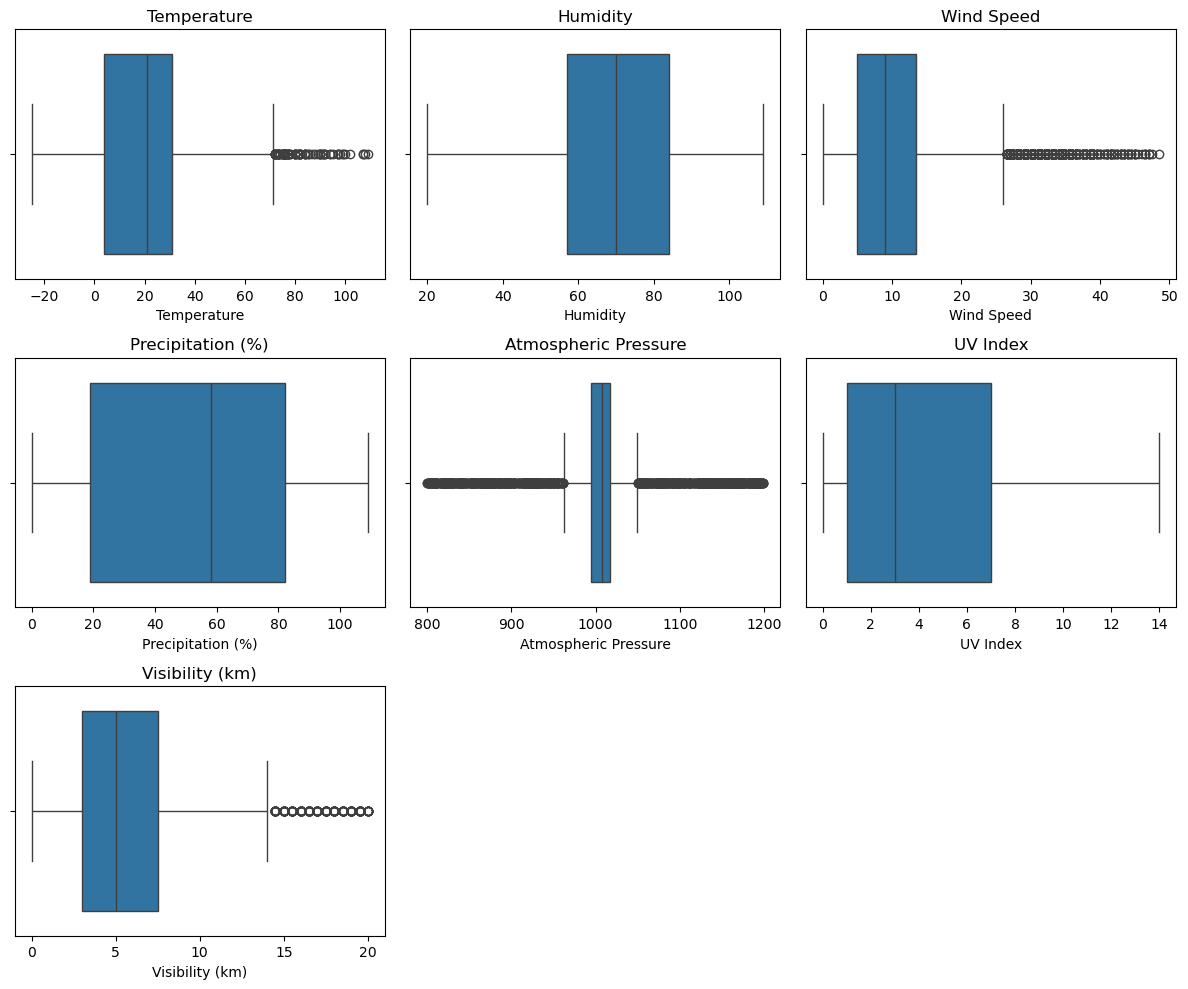

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = ['Temperature','Humidity','Wind Speed','Precipitation (%)',
                      'Atmospheric Pressure','UV Index','Visibility (km)']

plt.figure(figsize=(12, 10))  # Adjust figure size
rows, cols = 3, 3  # 3x3 grid layout

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(data=df, x=feature)
    plt.title(feature)

plt.tight_layout()  # Prevent overlapping
plt.show()


<i>Handling Outlier using IQR</i>

In [11]:
import numpy as np

Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1

df= df[~((df[numerical_features] < (Q1 - 1.5 * IQR)) | 
                  (df[numerical_features] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [12]:
threshold = 1.3  # Adjust threshold
df= df[~((df[numerical_features] < (Q1 - threshold * IQR)) | 
                  (df[numerical_features] > (Q3 + threshold * IQR))).any(axis=1)]

<i>Ploting After Handling the Outlier</i>

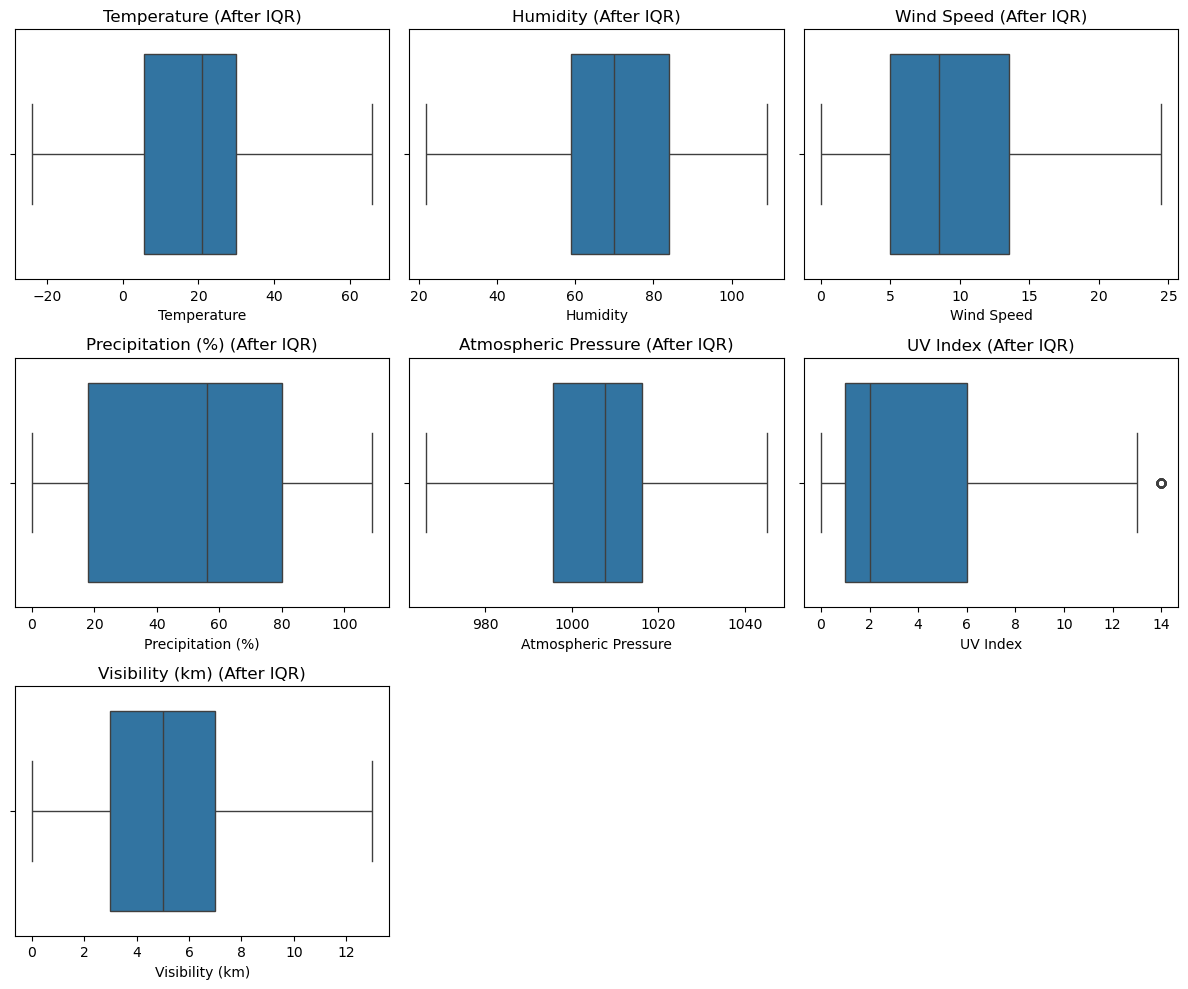

In [13]:
plt.figure(figsize=(12, 10))  # Adjust figure size
rows, cols = 3, 3  # Grid layout for subplots

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(data=df, x=feature)
    plt.title(f"{feature} (After IQR)")

plt.tight_layout()
plt.show()

<i>Here we printing the Target Distribution By Each Features</i>

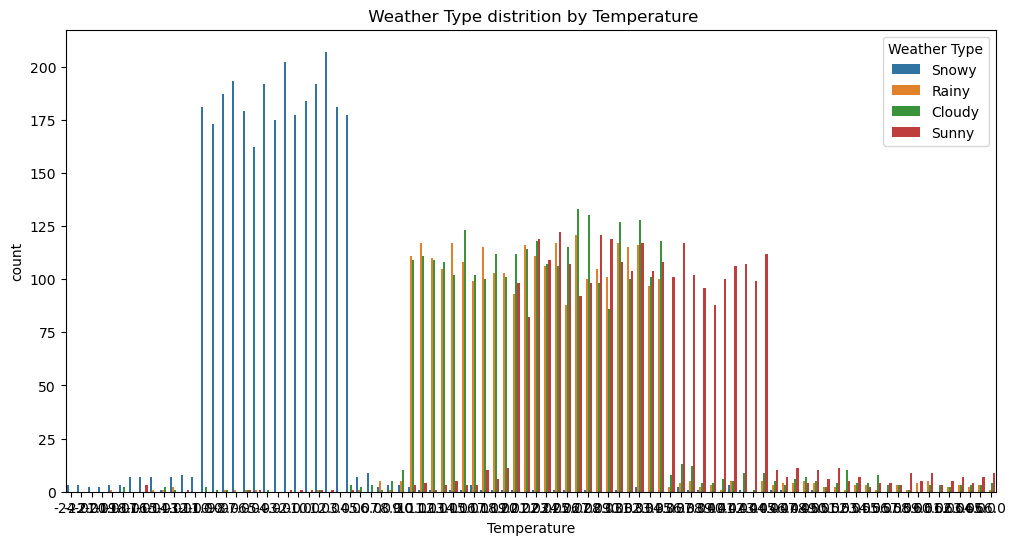

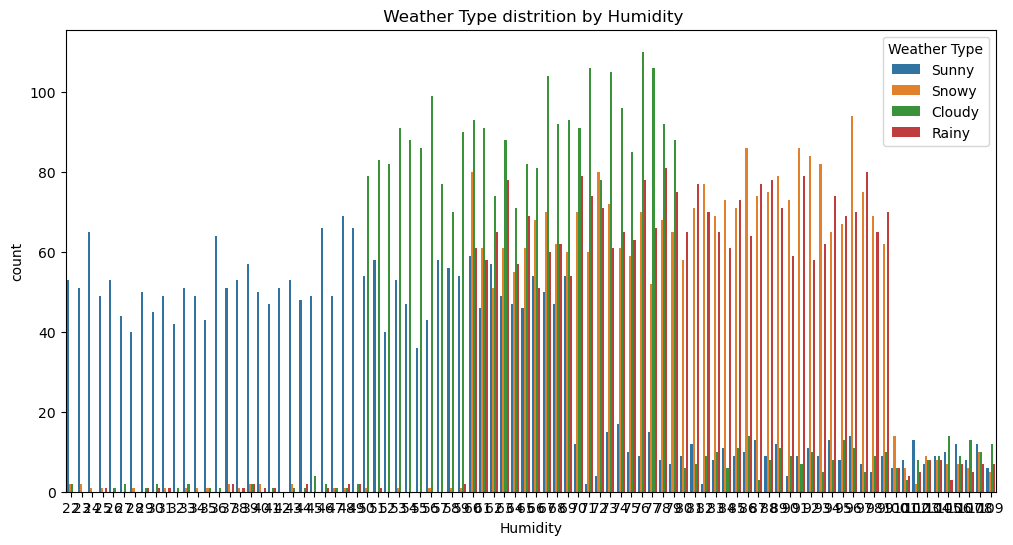

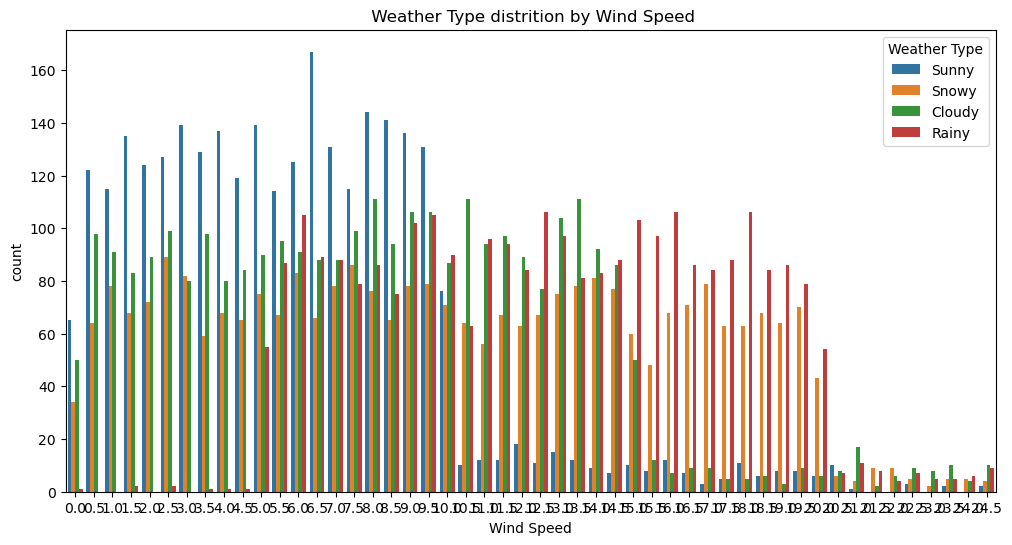

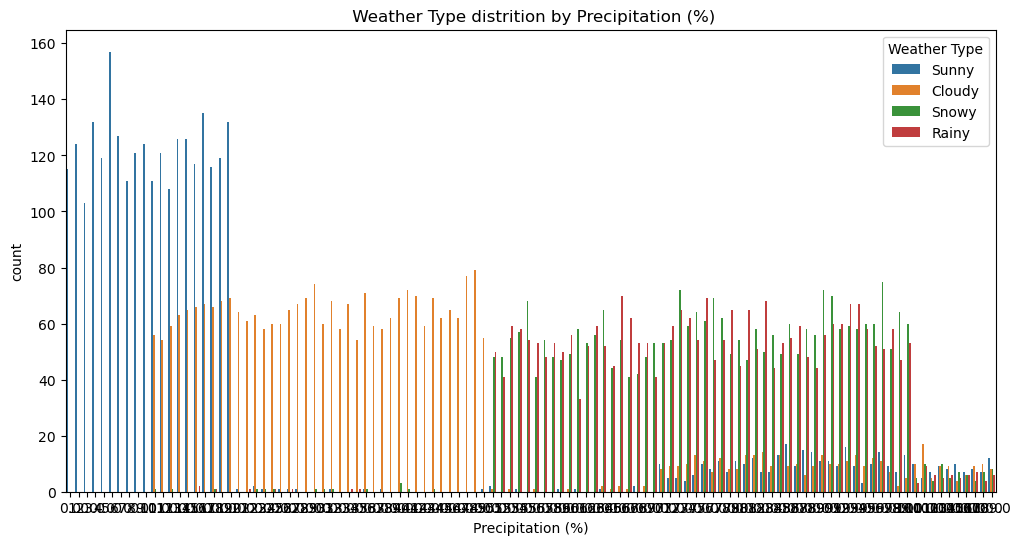

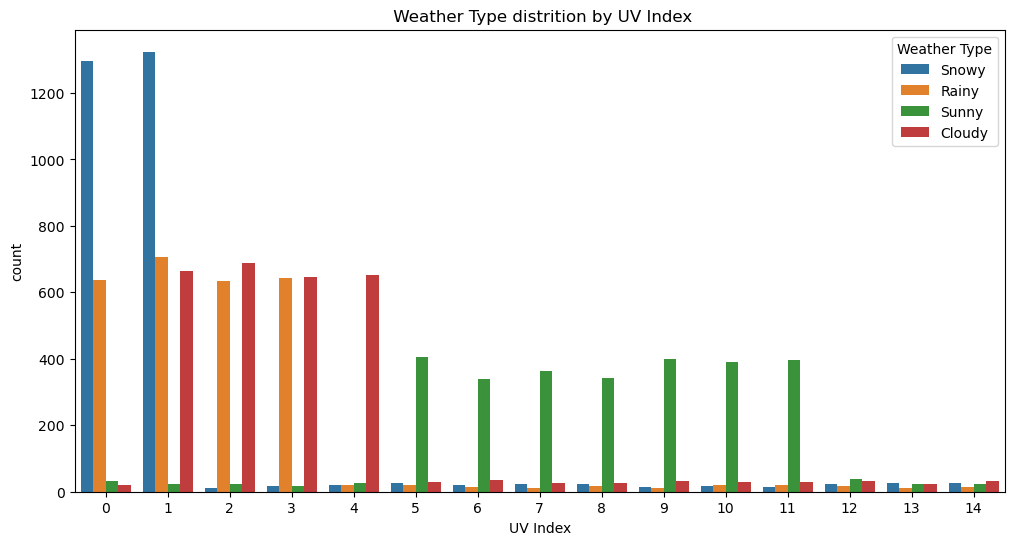

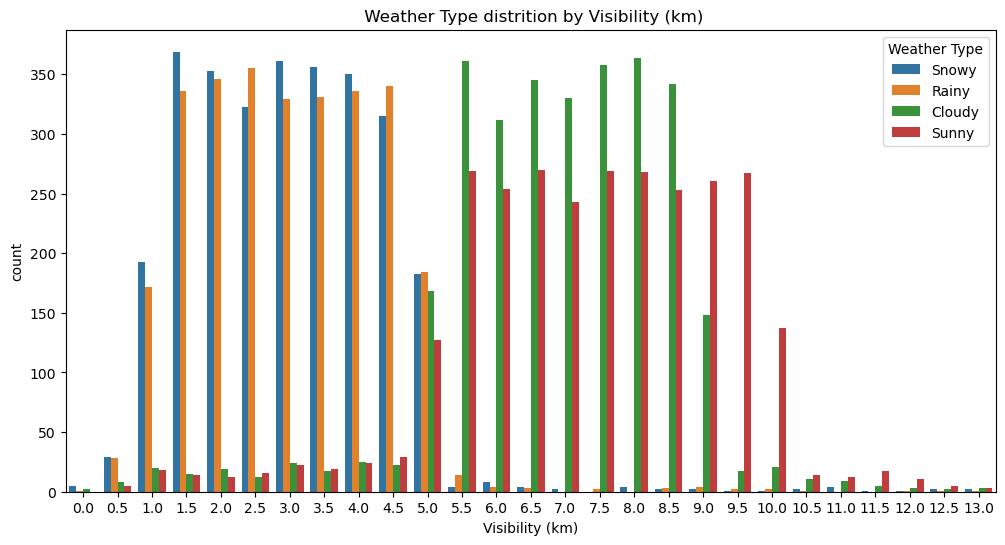

In [14]:
num_cols = ['Temperature','Humidity','Wind Speed','Precipitation (%)','UV Index','Visibility (km)']

for col in num_cols:
    plt.figure(figsize=(12,6))
    sns.countplot(x=col, hue='Weather Type', data=df)
    plt.title(" Weather Type distrition by " + col)
    plt.show()



<i>Ploting Correlaton Using Heat map</i>

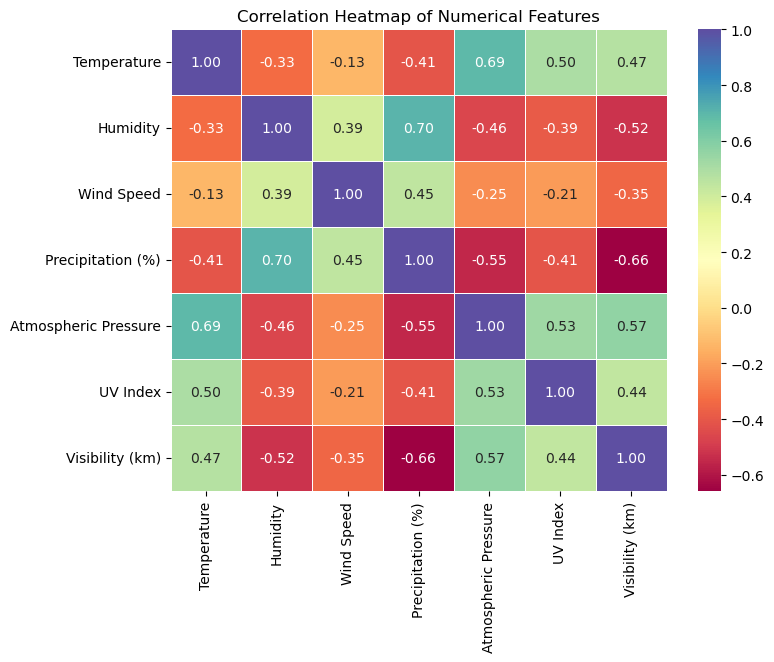

In [15]:
numerical_columns = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix=numerical_columns.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Spectral', fmt=".2f", linewidths=0.5)


plt.title("Correlation Heatmap of Numerical Features")
plt.show()

<i>Here we are Encodeing the Categorical features</i>

In [16]:
# Select categorical features
cate = df.select_dtypes(include='object')

# Initialize LabelEncoder
lab_enc = LabelEncoder()

# Apply encoding to each categorical column
for col in cate.columns:
    df[col] = lab_enc.fit_transform(df[col])
    

<i><b>Here we Starting the Machine Learning Steps<b></i>

<i>Here are taking the feature(X) and Target(y)</i> 

In [17]:
X = df.drop(columns=['Weather Type'])  # Features
y = df['Weather Type']  # Target variable


<i>Here we are doing train test split for training process and testing process</i>

In [18]:
# Proper train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Verify the shapes 
print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape, "y_test shape:", y_test.shape)

X_train shape: (9180, 10) y_train shape: (9180,)
X_test shape: (2295, 10) y_test shape: (2295,)


Scaling the values of x for the algorithms that required scaled x values

In [19]:
# scaler = StandardScaler()
# X_train=scaler.fit_transform(X_train)
# X_test=scaler.fit_transform(X_test)

Checking the the shape of X,y train,test

In [20]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(9180, 10) (9180,)
(2295, 10) (2295,)


Here we are Implementing the model Decission Tree and Evaluateing the model

In [21]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Train a Decision Tree Classifier
dt = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
dt.fit(X_train, y_train)
# Make predictions
y_pred = dt.predict(X_test)
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9529

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.89      0.93       593
           1       0.93      0.97      0.95       559
           2       0.99      0.98      0.99       575
           3       0.92      0.97      0.95       568

    accuracy                           0.95      2295
   macro avg       0.95      0.95      0.95      2295
weighted avg       0.95      0.95      0.95      2295


Confusion Matrix:
 [[529  28   2  34]
 [  7 542   1   9]
 [  5   1 564   5]
 [  5   9   2 552]]


Applying Hyperparameter to increase the Accuracy

In [22]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [5, 10, 15],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 5, 10]
}

# Perform GridSearchCV
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model
best_dt = grid_search.best_estimator_

# Make predictions
y_pred = best_dt.predict(X_test)

# Evaluate
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.9647058823529412
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.95       593
           1       0.96      0.96      0.96       559
           2       0.98      0.99      0.98       575
           3       0.97      0.97      0.97       568

    accuracy                           0.96      2295
   macro avg       0.96      0.96      0.96      2295
weighted avg       0.96      0.96      0.96      2295



Here we checking the model any overfitting or underfitting

In [23]:


# Predictions
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

# Accuracy Scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")


Training Accuracy: 0.9688
Testing Accuracy: 0.9529


Saveing the model

In [24]:
import joblib

joblib.dump(dt, "weather_model.pkl") 
# joblib.dump(scaler, "scaler.pkl")  # Save the scaler as well

['weather_model.pkl']

predicting for new data

In [ ]:
import pandas as pd

# Define category mappings (same as used in training)
cloud_cover_map = {"clear": 0, "partly cloudy": 1, "overcast": 2, "foggy": 3}
season_map = {"winter": 3, "spring": 1, "summer": 2, "autumn": 0}
location_map = {"inland": 1, "coastal": 0, "mountain": 2}

# Define value limits for numerical inputs
limits = {
    "Temperature": (0, 50),  # Min 0°C, Max 50°C
    "Humidity": (0, 100),  # Percentage
    "Wind Speed": (0, 50),  # km/h
    "Atmospheric Pressure": (900, 1100),  # Corrected range
    "Precipitation": (0, 100),  # Percentage
    "UV Index": (0, 15),  # Typical range
    "Visibility": (0, 50)  # km
}

# Function to get validated numerical input within limits
def get_valid_number(prompt, min_val, max_val, dtype):
    while True:
        user_input = input(f"{prompt} (Range: {min_val}-{max_val}): ").strip()
        if user_input.lower() == "q":
            print("Loop Terminated!")
            raise SystemExit
        try:
            val = dtype(user_input)
            if min_val <= val <= max_val:
                return val
            else:
                print(f"Please enter a value inside the given range: {min_val}-{max_val}!")
        except ValueError:
            print(f"Invalid input! Please enter a valid {dtype.__name__} or 'Q' to quit.")

# Function to get categorical input and convert to numeric
def get_valid_category(prompt, category_map):
    while True:
        user_input = input(f"{prompt} {list(category_map.keys())}: ").strip().lower()
        user_input = " ".join(user_input.split())  # Remove extra spaces
        if user_input in category_map:
            return category_map[user_input]  # Return the encoded value
        else:
            print(f"Invalid input! Choose from: {', '.join(category_map.keys())}")

# Collecting User Input
print("\nEnter values for the following features (Enter 'Q' to Quit):")

temp = get_valid_number("Temperature", *limits["Temperature"], float)
humidity = get_valid_number("Humidity", *limits["Humidity"], int)
wind_speed = get_valid_number("Wind Speed", *limits["Wind Speed"], float)
precipitation = get_valid_number("Precipitation", *limits["Precipitation"], float)
pressure = get_valid_number("Atmospheric Pressure", *limits["Atmospheric Pressure"], float)
uv_index = get_valid_number("UV Index", *limits["UV Index"], int)
visibility = get_valid_number("Visibility", *limits["Visibility"], float)

# Collect categorical inputs with human-readable options
cloud_cover = get_valid_category("Cloud Cover", cloud_cover_map)
season = get_valid_category("Season", season_map)
location = get_valid_category("Location", location_map)

# Create DataFrame for model input
user_df = pd.DataFrame([[temp, humidity, wind_speed, precipitation, cloud_cover, 
                         pressure, uv_index, season, visibility, location]],
                       columns=["Temperature", "Humidity", "Wind Speed", "Precipitation",
                                "Cloud Cover", "Atmospheric Pressure", "UV Index", "Season", 
                                "Visibility", "Location"])

print("\nUser input as DataFrame:\n", user_df)

# Ensure dt (Decision Tree model) is loaded
try:
    prediction = dt.predict(user_df)  # No standardization applied here
    print("\nPredicted Weather Type:", prediction[0])

    # Mapping numerical prediction to weather conditions
    weather_conditions = {0: "Cloudy", 1: "Rainy", 2: "Snowy", 3: "Sunny"}
    print(f"Weather Prediction: {weather_conditions.get(prediction[0], 'Unknown')}")

except NameError:
    print("\nError: Model (dt) not found. Make sure it is loaded before running predictions!")
